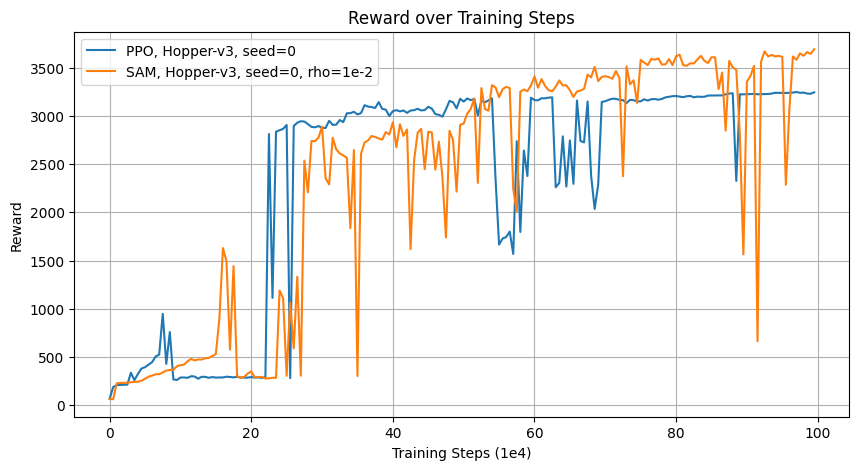

In [1]:
# read npy file
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the .npy file
data_ppo = np.load('data_train/archived/PPO_continuous_Gaussian_env_Hopper-v3_number_1_seed_0_GAMMA_1.npy', allow_pickle=True)
# data_old = np.load('data_train/archived/SAM_PPO_continuous_Gaussian_env_Hopper-v3_number_1_seed_0_GAMMA_1.npy', allow_pickle=True)
# # data_seed1 = np.load('data_train/archived/SAM_PPO_continuous_Gaussian_env_Hopper-v3_number_1_seed_1_GAMMA_1.npy', allow_pickle=True)
# data2 = np.load('data_train/archived/SAM_PPO_continuous_Gaussian_env_Hopper-v3_number_1_seed_2_GAMMA_1.npy', allow_pickle=True)
# data_temp = np.load('data_train/archived/SAM_PPO_continuous_Gaussian_env_Hopper-v3_number_2_seed_0_GAMMA_1.npy', allow_pickle=True)
data_unscaled = np.load('data_train/archived/SAM_PPO_continuous_Gaussian_env_Hopper-v3_number_2_seed_0_GAMMA_1_plus.npy', allow_pickle=True)
# length = min(data_ppo.shape[0], data_old.shape[0], data2.shape[0], data_temp.shape[0], data_unscaled.shape[0])
length = min(data_ppo.shape[0], data_unscaled.shape[0])


# plot the data
plt.figure(figsize=(10, 5))
# plt.plot(data[0], label='Episode Length')
plt.plot(np.arange(length) * 0.5, data_ppo[:length], label="PPO, Hopper-v3, seed=0")
# plt.plot(np.arange(length) * 0.5, data_old[:length], label="SAM, Hopper-v3, seed=0, rho=1e-2")
# plt.plot(np.arange(length) * 0.5, data2[:length], label="SAM, Hopper-v3, seed=2, rho=1e-15")
plt.plot(np.arange(length) * 0.5, data_unscaled[:length], label="SAM, Hopper-v3, seed=0, rho=1e-2")
plt.xlabel('Training Steps (1e4)')
plt.ylabel('Reward')
plt.title('Reward over Training Steps')
plt.legend(loc="upper left")
plt.grid()
plt.show()


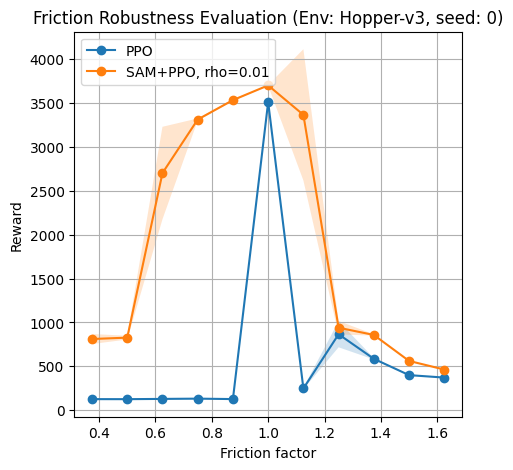

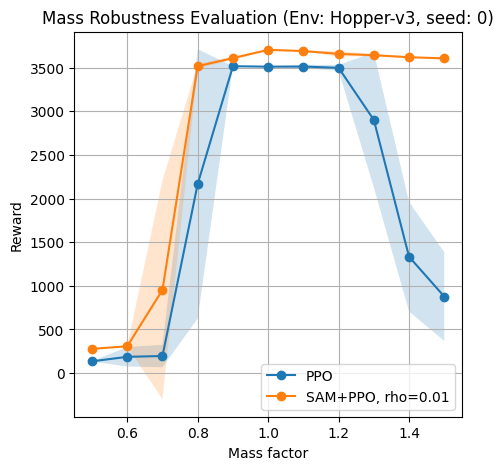

<Figure size 500x500 with 0 Axes>

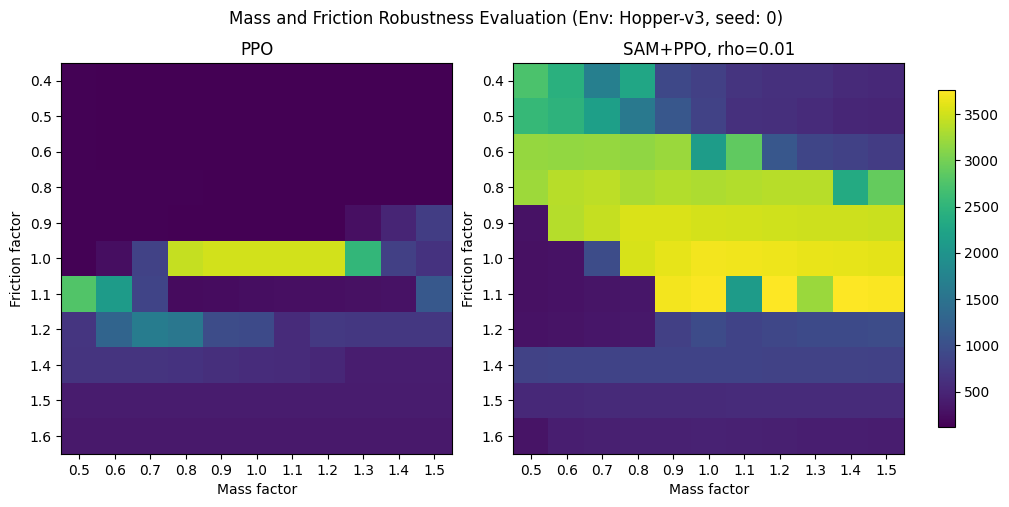

In [8]:
def plot_fricmass_eval_exp(prefix=["perturbed_results/archived/PPO_Hopper-v3_1_t"], suffix=[""], names=[""], env="Hopper-v3", seed=0):
    '''
        e.g., suffix="_rho0.01"
    '''
    data = {}
    for i in range(len(prefix)):
        data[prefix[i]] = {}
        data[prefix[i]]["f_avg"] = np.load(f'{prefix[i]}_friction_avgs_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["f_std"] = np.load(f'{prefix[i]}_friction_stds_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["m_avg"] = np.load(f'{prefix[i]}_mass_avgs_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["m_std"] = np.load(f'{prefix[i]}_mass_stds_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["fm_avg"] = np.load(f'{prefix[i]}_mass_and_friction_avgs_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["fm_std"] = np.load(f'{prefix[i]}_mass_and_friction_stds_1{suffix[i]}.npy', allow_pickle=True)
    
    plt.figure(figsize=(5, 5))
    for i in range(len(prefix)):
        plt.plot(np.arange(0.375, 1.626, 0.125), 
                 data[prefix[i]]["f_avg"], label=f"{names[i]}", marker='o')
        plt.fill_between(np.arange(0.375, 1.626, 0.125), 
                         data[prefix[i]]["f_avg"] - data[prefix[i]]["f_std"], 
                         data[prefix[i]]["f_avg"] + data[prefix[i]]["f_std"],
                         alpha=0.2)
    plt.xlabel('Friction factor')
    plt.ylabel('Reward')
    plt.title(f'Friction Robustness Evaluation (Env: {env}, seed: {seed})')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(5, 5))
    for i in range(len(prefix)):
        plt.plot(np.arange(0.5, 1.51, 0.1), data[prefix[i]]["m_avg"], label=f"{names[i]}", marker='o')
        plt.fill_between(np.arange(0.5, 1.51, 0.1), data[prefix[i]]["m_avg"] - data[prefix[i]]["m_std"], data[prefix[i]]["m_avg"] + data[prefix[i]]["m_std"], alpha=0.2)
    plt.xlabel('Mass factor')
    plt.ylabel('Reward')
    plt.title(f'Mass Robustness Evaluation (Env: {env}, seed: {seed})')
    plt.legend()
    plt.grid()
    plt.show()

    # mass and friction heatmap
    plt.figure(figsize=(5, 5))
    fig, axes = plt.subplots(1, len(prefix), figsize=(10, 5), constrained_layout=True)
    v_min = np.inf
    v_max = -np.inf
    for i in range(len(prefix)):
        v_min = min(v_min, np.min(data[prefix[i]]["fm_avg"]))
        v_max = max(v_max, np.max(data[prefix[i]]["fm_avg"]))
    for i in range(len(prefix)):
        im = axes[i].imshow(data[prefix[i]]["fm_avg"].reshape((11, 11)), vmin=v_min, vmax=v_max)
        axes[i].set_title(f"{names[i]}")
        axes[i].set_xlabel('Mass factor')
        axes[i].set_ylabel('Friction factor')
        axes[i].set_xticks(np.arange(0, 11), np.round(np.arange(0.5, 1.51, 0.1), 1))
        axes[i].set_yticks(np.arange(0, 11), np.round(np.arange(0.375, 1.626, 0.125), 1))
        # axes[i].grid()
    fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
    plt.suptitle(f'Mass and Friction Robustness Evaluation (Env: {env}, seed: {seed})')
    plt.show()




plot_fricmass_eval_exp(prefix=["perturbed_results/archived/PPO_Hopper-v3_1_t", "perturbed_results/archived/SAM_PPO_Hopper-v3_1_t"], suffix=["", "_rho0.01"], names= ["PPO", "SAM+PPO, rho=0.01"], env="Hopper-v3", seed=0)
    

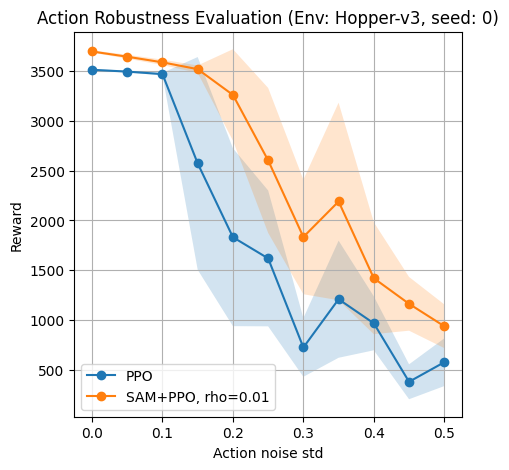

In [9]:
def plot_action_eval_exp(prefix=["perturbed_results/archived/PPO_Hopper-v3_1"], suffix=[""], names=[""], env="Hopper-v3", seed=0):
    '''
        e.g., suffix="_rho0.01"
    '''
    data = {}
    for i in range(len(prefix)):
        data[prefix[i]] = {}
        data[prefix[i]]["ac_avg"] = np.load(f'{prefix[i]}_action_noise_avgs_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["ac_std"] = np.load(f'{prefix[i]}_action_noise_stds_1{suffix[i]}.npy', allow_pickle=True)
        data[prefix[i]]["ac_level"] = np.load(f'{prefix[i]}_action_noise_levels.npy', allow_pickle=True)
    
    plt.figure(figsize=(5, 5))
    for i in range(len(prefix)):
        plt.plot(data[prefix[i]]["ac_level"], data[prefix[i]]["ac_avg"], label=f"{names[i]}", marker='o')
        plt.fill_between(data[prefix[i]]["ac_level"], data[prefix[i]]["ac_avg"] - data[prefix[i]]["ac_std"], data[prefix[i]]["ac_avg"] + data[prefix[i]]["ac_std"], alpha=0.2)
    plt.xlabel('Action noise std')
    plt.ylabel('Reward')
    plt.title(f'Action Robustness Evaluation (Env: {env}, seed: {seed})')
    plt.legend()
    plt.grid()
    plt.show()

plot_action_eval_exp(prefix=["perturbed_results/archived/PPO_Hopper-v3_1", "perturbed_results/archived/SAM_PPO_Hopper-v3_1"], suffix=["", "_rho0.01"], names= ["PPO", "SAM+PPO, rho=0.01"], env="Hopper-v3", seed=0)